<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names


--2023-02-28 23:14:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4340 (4.2K) [application/x-httpd-php]
Saving to: ‘diagnosis.names’

diagnosis.names     100%[===================>]   4.24K  --.-KB/s    in 0s      

2023-02-28 23:14:41 (95.3 MB/s) - ‘diagnosis.names’ saved [4340/4340]



In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data

--2023-03-01 00:01:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7276 (7.1K) [application/x-httpd-php]
Saving to: ‘diagnosis.data’

diagnosis.data      100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-03-01 00:01:41 (151 MB/s) - ‘diagnosis.data’ saved [7276/7276]



In [ ]:
pd_data=pd.read_csv('/content/diagnosis.csv')
dataset=pd_data.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(dataset[:,:6],dataset[:,6:], test_size=0.33)

In [ ]:
temp_train, nocc_train, lumb_train,up_train,mict_train,bis_train=np.transpose(X_train)
temp_test,nocc_test, lumb_test, up_test, mict_test,bis_test=np.transpose(X_test)
inflm_train,nephr_train=Y_train[:,0],Y_train[:,1]
inflm_test,nephr_test=Y_test[:,0],Y_test[:,1]

In [ ]:
from tensorflow.keras import Input,layers
shape_input=(1,)
temperature=Input(shape=shape_input,name='temp')
nausea_occurence=Input(shape=shape_input,name='nocc')
lumbar_pain=Input(shape=shape_input,name='lumbp')
urine_pushing=Input(shape=shape_input,name='up')
micturition_pains=Input(shape=shape_input,name='mict')
bis=Input(shape=shape_input,name='bis')

In [ ]:
list_inputs=[temperature,nausea_occurence,lumbar_pain,urine_pushing,micturition_pains,bis]

In [ ]:
x=layers.concatenate(list_inputs)

In [ ]:
inflammation_pred=layers.Dense(1,activation='sigmoid', name='inflam')(x)
nephrititis_pred=layers.Dense(1,activation='sigmoid', name='nephr')(x)


In [ ]:
list_outputs=[inflammation_pred,nephrititis_pred]

In [ ]:
model=tf.keras.Model(inputs=list_inputs,outputs=list_outputs)

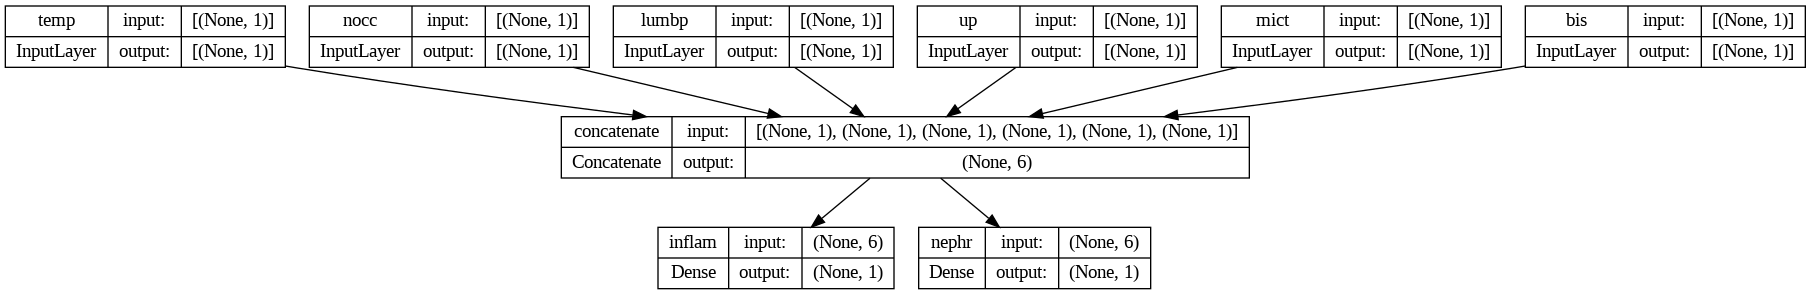

In [ ]:
tf.keras.utils.plot_model(model,'MULTI_MODEL_OUTPUT.png',show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.3), loss={'inflam':'binary_crossentropy','nephr':'binary_crossentropy'},
              metrics=[['acc'],['mae']],
              loss_weights=[1.,0.2])

In [ ]:
inputs_train={'temp':temp_train,'nocc':nocc_train,'lumbp':lumb_train,
              'up':up_train,'mict':mict_train,'bis':bis_train}
outputs_train={'inflam':inflm_train,'nephr':nephr_train}

In [ ]:
history=model.fit(inputs_train,outputs_train,epochs=10000,batch_size=128,verbose=False)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


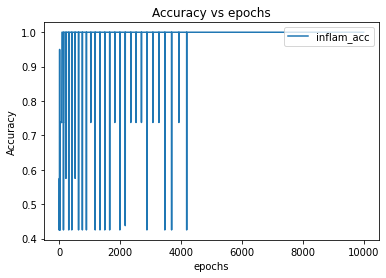

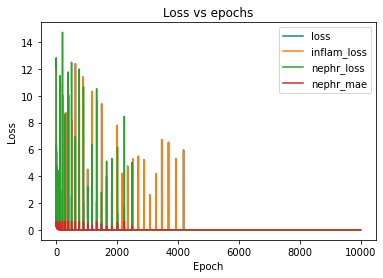

In [40]:
acc_keys=[k for k in history.history.keys() if k in ('inflam_acc','nephr_acc')]
loss_keys=[k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
  if k in acc_keys:
    plt.figure(1)
    plt.plot(v)
  else:
    plt.figure(2)
    plt.plot(v)
plt.figure(1)
plt.title('Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(acc_keys,loc='upper right')

plt.figure(2)
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys,loc='upper right')
plt.show()


In [45]:
model.evaluate([temp_test,nocc_test,lumb_test,up_test,mict_test,bis_test],[inflm_test,nephr_test],verbose=2)

2/2 - 0s - loss: 1.3711e-06 - inflam_loss: 7.0135e-07 - nephr_loss: 3.3488e-06 - inflam_acc: 1.0000 - nephr_mae: 3.3503e-06 - 78ms/epoch - 39ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


[1.3710981647818699e-06,
 7.013471758909873e-07,
 3.348755399201764e-06,
 1.0,
 3.3502572023280663e-06]